In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt
import glob
import random 
import h5py
import os

# Settings.
scale = 3 # 몇배로 scaling건지
size_input = 120 # sub image data size
size_label = 120
sub_sampling_data=[]
image_data=[]#training data load 
for i in glob.glob("./Train/*.bmp"):# load image data
    n=cv2.imread(i,cv2.IMREAD_COLOR)
    n=cv2.cvtColor(n, cv2.COLOR_BGR2RGB)# matplotlib = RGB channel , opencv = BGR channels
    image_data.append(n)

C:\Users\Robotmedia9\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:

#image subsampling (상하좌우 4장, 이미지 중앙 sub smapling)
def sub_sampling(image,size_input):#image, crop size, stride 
    sub_data=[]
    size = image.shape    # image size
    rows, cols = size[:2]      # rows,cols
    counter=0
    # Generate subimages for training.
    for x in range(0, rows - size_input, rows-size_input-1):
        for y in range(0, cols - size_input, cols-size_input-1):
            subim_input = image[x : x + size_input, y : y + size_input]
            sub_data.append(subim_input)
            counter+=1
    center_x=int((rows-size_input)/2)
    center_y=int((cols-size_input)/2)
    
    sub_data.append(image[center_x : center_x + size_input, center_y :center_y + size_input])
    counter+=1
#     print("image_size : ",rows-size_input,cols-size_input)
#     print("number of sampling data",counter,"center_x ,y : ",center_x,center_y)
    return sub_data

In [3]:
#image rotation sub sampling
def rotated_image(image,size_input,degree=1): # degree ==> 1은 좌우 반전, 0은 상하 반전입니다.
    
    flipped_data=[]
    data=sub_sampling(image,size_input)
    for i in range(len(data)):
        flip=cv2.flip(data[i], degree)
        flipped_data.append(flip)
    flipped_data+=data
    return flipped_data

In [4]:
image_sub=[]
for i in range(len(image_data)):
    sub_i=sub_sampling(image_data[i],100)
    image_sub+=sub_i
    

In [5]:
print(len(image_sub))

17940


In [6]:
image_aug=[]
for i in range(len(image_data)):
    rotate=rotated_image(image_data[i],100)
    image_aug+=rotate
    

In [7]:
print(len(image_aug))

35880


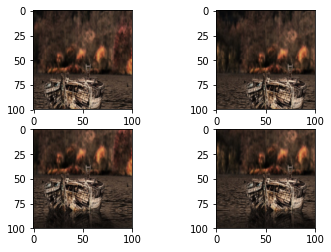

In [8]:
plt.subplot(2,2,1)
plt.imshow(image_aug[0])
plt.subplot(2,2,2)
plt.imshow(image_aug[1])
plt.subplot(2,2,3)
plt.imshow(image_aug[2])
plt.subplot(2,2,4)
plt.imshow(image_aug[3])


In [15]:
x_data=[]
y_data=[]
image_size=120
scale=2
for i in range(len(image_aug)):
    tmp_image=image_aug[i]
    size = tmp_image.shape    # image size
    height, width = size[:2]      # height ,width
    tmp_X=cv2.resize(tmp_image,None,fx=1/scale,fy=1/scale)
    sub_X=cv2.resize(tmp_X,(image_size, image_size),interpolation=cv2.INTER_CUBIC)
    
    sub_Y=cv2.resize(tmp_image,(image_size, image_size),interpolation=cv2.INTER_CUBIC)
    
    x_data.append(sub_X)
    y_data.append(sub_Y)

In [16]:
print(len(x_data))

35880


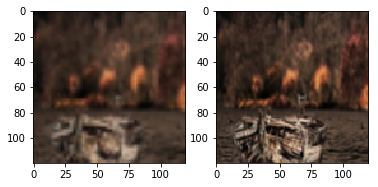

In [17]:
plt.subplot(1,2,1)
plt.imshow(x_data[0])
plt.subplot(1,2,2)
plt.imshow(y_data[0])


In [18]:

with h5py.File("./training_image.h5", 'w') as hf:
        hf.create_dataset('data', data=x_data)
        hf.create_dataset('label', data=y_data)
        

In [20]:
with h5py.File("./training_image.h5", 'r') as hf:
        data = np.array(hf.get('data'))
        label = np.array(hf.get('label'))

In [21]:
print(len(data))

35880


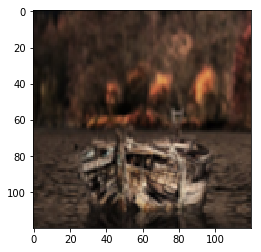

In [27]:
plt.imshow(label[4])